### Problem Statement

I decided to treat this as a classification problem by creating a new binary variable affair
(did the woman have at least one affair?) and trying to predict the classification for each
woman.

In [240]:
# Import Necessary Libraries

import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
from patsy import dmatrices
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn import metrics
dta = sm.datasets.fair.load_pandas().data

In [242]:
#Quick look of the data imported

dta.head()

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs
0,3.0,32.0,9.0,3.0,3.0,17.0,2.0,5.0,0.111111
1,3.0,27.0,13.0,3.0,1.0,14.0,3.0,4.0,3.230769
2,4.0,22.0,2.5,0.0,1.0,16.0,3.0,5.0,1.400000
3,4.0,37.0,16.5,4.0,3.0,16.0,5.0,5.0,0.727273
4,5.0,27.0,9.0,1.0,1.0,14.0,3.0,4.0,4.666666


In [243]:
# add "affair" column: 1 represents having affairs, 0 represents not

dta['affair'] = (dta.affairs > 0).astype(int)

In [246]:
# Study/Explore the data

dta.describe()

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs,affair
count,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000
mean,4.109645,29.082862,9.009425,1.396874,2.426170,14.209865,3.424128,3.850141,0.705374,0.322495
std,0.961430,6.847882,7.280120,1.433471,0.878369,2.178003,0.942399,1.346435,2.203374,0.467468
min,1.000000,17.500000,0.500000,0.000000,1.000000,9.000000,1.000000,1.000000,0.000000,0.000000
25%,4.000000,22.000000,2.500000,0.000000,2.000000,12.000000,3.000000,3.000000,0.000000,0.000000
50%,4.000000,27.000000,6.000000,1.000000,2.000000,14.000000,3.000000,4.000000,0.000000,0.000000
75%,5.000000,32.000000,16.500000,2.000000,3.000000,16.000000,4.000000,5.000000,0.484848,1.000000
max,5.000000,42.000000,23.000000,5.500000,4.000000,20.000000,6.000000,6.000000,57.599991,1.000000


#### Observation:
No Missing data

In [247]:
# Understand the data as to what percent of the data shows the women having affairs

have_affairs=len(dta[dta['affair']==1])
no_affairs=len(dta[dta['affair']==0])

print('# of Women having affairs = {}'.format(have_affairs))
print('# of Women with no affair = {}'.format(no_affairs))

r=have_affairs/no_affairs
print('Ratio: Women having affairs/Women Having No affairs = {}'.format(r))

# of Women having affairs = 2053
# of Women with no affair = 4313
Ratio: Women having affairs/Women Having No affairs = 0.47600278228611176


In [40]:
# As we may think, how women rate their marriages may indicate them having affairs, let us understand this:

dta.groupby('rate_marriage').mean()

,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs,affair
rate_marriage,,,,,,,,,
1.0,33.823232,13.914141,2.308081,2.343434,13.848485,3.232323,3.838384,1.201671,0.747475
2.0,30.471264,10.727011,1.735632,2.330460,13.864943,3.327586,3.764368,1.615745,0.635057
3.0,30.008056,10.239174,1.638469,2.308157,14.001007,3.402820,3.798590,1.371281,0.550856
4.0,28.856601,8.816905,1.369536,2.400981,14.144514,3.420161,3.835861,0.674837,0.322926
5.0,28.574702,8.311662,1.252794,2.506334,14.399776,3.454918,3.892697,0.348174,0.181446


#### Observations:
On an average, women who have affairs rate their marriages lower.<br>
Increase in <b>Age, yrs_married</b> and <b>children</b> shows decreasing <b>rate_marriage</b>

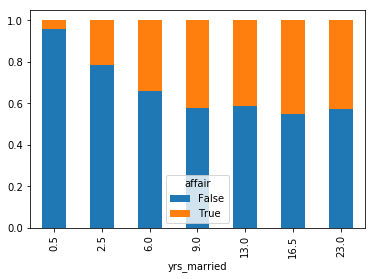

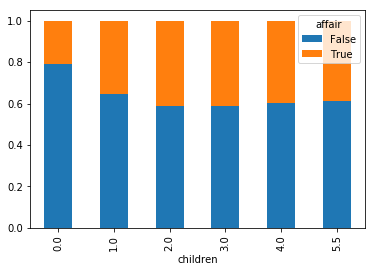

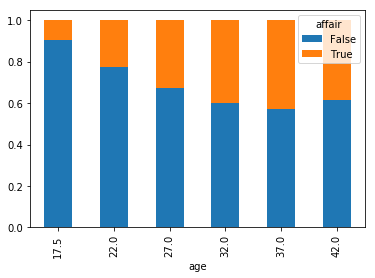

In [248]:
#Let us see what how the women have rated their marriages based on yrs_married, age and number of children:

affair_yrs_married = pd.crosstab(dta.yrs_married, dta.affair.astype(bool))
affair_yrs_married.div(affair_yrs_married.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)

children = pd.crosstab(dta.children, dta.affair.astype(bool))
children.div(children.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)

age = pd.crosstab(dta.age, dta.affair.astype(bool))
age.div(age.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)

plt.show()

#### Obsevations:

Percentage of women having affairs is high for those with:<br>
>higher numbers of year they have been married<br>
>higer number of children<br>
>more age

### Data Preparation:

In [250]:
#Prepare  X(independent variable) and Y(target variable) 
# We also need to create dummy variables for the categorical variables 'occupation' and 'occupation_husb'

y, X = dmatrices('affair ~ rate_marriage + age + yrs_married + children + \
religious + educ + C(occupation) + C(occupation_husb)',
dta, return_type="dataframe")

#Check the columns now 

X.columns

Index(['Intercept', 'C(occupation)[T.2.0]', 'C(occupation)[T.3.0]',
       'C(occupation)[T.4.0]', 'C(occupation)[T.5.0]', 'C(occupation)[T.6.0]',
       'C(occupation_husb)[T.2.0]', 'C(occupation_husb)[T.3.0]',
       'C(occupation_husb)[T.4.0]', 'C(occupation_husb)[T.5.0]',
       'C(occupation_husb)[T.6.0]', 'rate_marriage', 'age', 'yrs_married',
       'children', 'religious', 'educ'],
      dtype='object')

In [251]:
#Rename the dummy variable columns

X = X.rename(columns = {'C(occupation)[T.2.0]':'occ_2',
                        'C(occupation)[T.3.0]':'occ_3',
                        'C(occupation)[T.4.0]':'occ_4',
                        'C(occupation)[T.5.0]':'occ_5',
                        'C(occupation)[T.6.0]':'occ_6',
                        'C(occupation_husb)[T.2.0]':'occ_husb_2',
                        'C(occupation_husb)[T.3.0]':'occ_husb_3',
                        'C(occupation_husb)[T.4.0]':'occ_husb_4',
                        'C(occupation_husb)[T.5.0]':'occ_husb_5',
                        'C(occupation_husb)[T.6.0]':'occ_husb_6'})

X.columns

Index(['Intercept', 'occ_2', 'occ_3', 'occ_4', 'occ_5', 'occ_6', 'occ_husb_2',
       'occ_husb_3', 'occ_husb_4', 'occ_husb_5', 'occ_husb_6', 'rate_marriage',
       'age', 'yrs_married', 'children', 'religious', 'educ'],
      dtype='object')

In [252]:
#Flatten y columns to convertitto 1_D array for sklearn to understand it as response variable

y=np.ravel(y)

In [253]:
#Split given dataset into train and test

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=1)

### Building the model

In [260]:
model = LogisticRegression()
result = model.fit(X_train,y_train)

print('Accuracy Score :',metrics.accuracy_score(y_train,np.where(result.predict(X_train)>0.5,1,0)))

Accuracy Score : 0.7248653500897666


C:\Users\PANKAJ\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


#### Observations:
> Only <b>rate_marriage, age,yrs_married,'religious'</b> have p-values very low(<.01)<br>
> Try Logisitc Regression of output field affair against these fields

In [261]:
y_trainv2, X_trainv2 = dmatrices('affair ~ rate_marriage + age + yrs_married +  religious', dta)      
model_v2 = LogisticRegression()
result_v2 = model_v2.fit(X_trainv2,y_trainv2)

print('Accuracy Score :',metrics.accuracy_score(y_train,np.where(result.predict(X_train)>0.5,1,0)))

Accuracy Score : 0.7248653500897666


C:\Users\PANKAJ\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\PANKAJ\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


#### Observation:
>No change in Accuracy. So, let us consider first model as final

### Validating the model on Test Dataset

#### Predict class labels for test dataset

In [262]:
#print(X_train.shape)
#print(X_test.shape)
predicted=model.predict(X_test)

print('Predictions for test data set response: ',predicted)

Predictions for test data set response:  [1. 1. 0. ... 0. 0. 0.]


In [264]:
#Finding probabilities for class labels

probs=model.predict_proba(X_test)
probs

array([[0.42971716, 0.57028284],
       [0.45675721, 0.54324279],
       [0.62046895, 0.37953105],
       ...,
       [0.52984945, 0.47015055],
       [0.80942229, 0.19057771],
       [0.61267236, 0.38732764]])

In [265]:
print('_'*30)
print('Accuracy Score: ')
print(metrics.accuracy_score(y_test,predicted))
print('_'*30)
print('_'*30)
print('Confusion Matrix :')
print(metrics.confusion_matrix(y_test,predicted))
print('_'*30)
print('_'*60)
print('Classification report: ')
print(metrics.classification_report(y_test,predicted))
print('_'*60)

______________________________
Accuracy Score: 
0.7335078534031414
______________________________
______________________________
Confusion Matrix :
[[1170  129]
 [ 380  231]]
______________________________
____________________________________________________________
Classification report: 
              precision    recall  f1-score   support

         0.0       0.75      0.90      0.82      1299
         1.0       0.64      0.38      0.48       611

   micro avg       0.73      0.73      0.73      1910
   macro avg       0.70      0.64      0.65      1910
weighted avg       0.72      0.73      0.71      1910

____________________________________________________________


### Comments about the model

we observe that:
>The model is predicting at accuracy of <b>73.35%</b><br>
>The precision of predicting an women to have affair, for an women who actually has an affair in data set(i.e 'affair' in y_test=1) = <b>64%